In [ ]:
# What is the True Normal Human Body Temperature?
"""
Background
The mean normal body temperature was held to be 37C or 98.6F
for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in
a famous 1868 book. But, is this value statistically correct?
"""

In [1]:
# import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [2]:
# Read data
df_temp = pd.read_csv('C:/Users/rivas/OneDrive/Documents/JMR/Education/Springboard/Projects/EDA/human_body_temperature.csv')

# Basic EDA
print(df_temp.info())
print(df_temp.head())
print(df_temp.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None
   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000


In [ ]:
##############################################
#1 -  Is the distribution of body temperatures normal?

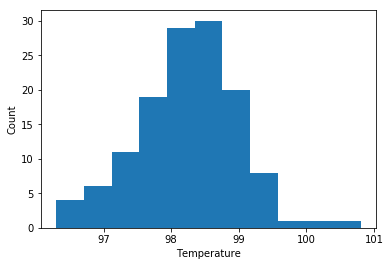

In [3]:
#      Prepare to plot data as a histogram - Find bins size
n_data = len(df_temp)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)

# Plot the histogram
_ =plt.hist(df_temp.temperature, bins=n_bins)
_ =plt.xlabel('Temperature')
_ =plt.ylabel('Count')
plt.show()


In [4]:
#
chi,p_value = stats.normaltest(df_temp.temperature)
print(chi,p_value)


# "H0 - Not Normal Distribution"
if p_value < 0.05:
    print("Not Normal Distribution")
else:
    print("Normal Distribution")
    

2.70380143332 0.258747986349
Normal Distribution


In [ ]:
#1 - Answer
"""
Is the distribution of body temperatures normal? Yes
  Histogram resembles o a Bell Curve
  Based on the p_value( 0.26)> 0.05 it is a Normal Distribution
"""


In [5]:
##############################################
#2 - Is the sample size large? Are the observations independent?
len(df_temp)


130

In [ ]:
#2 - Answer
"""
Is the sample size large? Are the observations independent? Yes

    len(df_temp) = 130
    Central Limit Theorem (CLT) - Investopedia
       As a general rule, sample sizes equal to or greater than 30 are considered
       sufficient for the central limit theorem to hold, meaning the distribution of the
       sample means is fairly normally distributed.
"""

In [6]:
##############################################
# Define a function bootstrap_resample

def bootstrap_resample(X, n=None):
    """ Bootstrap resample an array_like
    Parameters
    ----------
    X : array_like
      data to resample
    n : int, optional
      length of resampled array, equal to len(X) if n==None
    Results
    -------
    returns X_resamples
    """
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = X[resample_i]
    return X_resample


In [ ]:
##############################################
#3 - Is the true population mean really 98.6 degrees F?
"""
First, try a bootstrap hypothesis test.

Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? 

In this situation, is it appropriate to use the t or z statistic?

Now try using the other test. How is the result be different? Why?
"""
#


In [11]:
# Generating bootstrap replicates
bs_sample = bootstrap_resample(df_temp.temperature, n=65)

# Initialize
mean_pop = 98.6
mean=bs_sample.mean()
std=bs_sample.std()
size_n=bs_sample.size

# Z_value 
mean_diff=mean-mean_pop
SE=std/(size_n**0.5)
Zval=round(float((mean_diff)/SE),3)
print(mean, std, SE, mean_diff,Zval)


98.10769230769236 0.78288482795757 0.09710491184963532 -0.4923076923076337 -5.07


In [12]:
# p_value
p_value=stats.norm.sf(abs(Zval))*2
print(p_value)


3.97815702207e-07


In [13]:
# Initialize
mean_pop = 98.6
mean=df_temp.temperature.mean()
std=df_temp.temperature.std()
size_n=df_temp.temperature.size

# Z_value 
mean_diff=mean-mean_pop
SE=std/(size_n**0.5)
Zval=round(float((mean_diff)/SE),3)
print(mean, std, SE, mean_diff,Zval)

Tval=round(float((mean_diff)/SE),3)


98.24923076923078 0.7331831580389454 0.06430441683789101 -0.35076923076921673 -5.455


In [ ]:
#Comparing Z-statistic and t-statistic


In [14]:
#    Critical t-value MOE-margin of error
critical_t=stats.t.ppf(0.975, size_n-1)
print(critical_t)


1.97852449146


In [15]:
moe_t=critical_t*std/np.sqrt(size_n)
print(moe_t)


0.127227863623


In [16]:
# Range of true mean using t- statistic with 95% confidence level, n=130 so degrees of freedom=129
mean_t1=mean+moe_t
mean_t2=mean-moe_t


In [17]:
#Critical z-value MOE-margin of error
critical_z=stats.norm.ppf(0.975)
print(critical_z)

moe_z=std*critical_z/np.sqrt(size_n)
print(moe_z)

# Range of true mean using z-statistic with 95% confidence level
mean_z1=mean+moe_z
mean_z2=mean-moe_z


1.95996398454
0.126034341049


In [18]:
print('Range 95% confindence level, range of true mean for ')
print('    z-statistic: ', round(mean_z2,2), round(mean_z1,2))
print('    t-statistic: ', round(mean_t2,2), round(mean_t1,2))


Range 95% confindence level, range of true mean for 
    z-statistic:  98.12 98.38
    t-statistic:  98.12 98.38


In [19]:
# H0 - Population Mean is 98.6 F  
p_value=stats.norm.sf(abs(Zval))*2
print(p_value)
             
if p_value<0.05:
    print('False: H0 - Population Mean is 98.6 F ')
else:
    print('True : H0 - Population Mean is 98.6 F ')
    

4.89728454795e-08
False: H0 - Population Mean is 98.6 F 


In [ ]:
#3 - Answer
"""
Is the true population mean really 98.6 degrees F? No
  The sample mean of 98.25F is 5.18(Zval) standard error units below the given population mean of 98.6F
  H0 - True Population Mean is 98.6 False 

One sample test is appropriate to use since a set of temperatures will be tested against the population mean of 98.6 F.
 1-sample t-test compares one sample mean to a null hypothesis value
 

Ideally t and z test will both work for large dataset. In this case, used the z test 
since the dataset is 130 > 30

Now try using the other test.
    How is the result be different?
        95% confindence level, range of true mean is  98.12  F to  98.38  F.
        for both tests
    Why?

If p_value is <  0.05, then H0 is False.
   p_value = 4.89728454795e-08:  False: H0 - Population Mean is 98.6 F

"""


In [21]:
##############################################
#4 - Draw a small sample of size 10 from the data and repeat both frequentist tests.

# Get subset of data (10)

np10 = np.empty(10)
for i in range(10):
    np10[i]= np.random.choice(df_temp.temperature)

print(np10)


[ 97.5  98.7  97.5  98.   97.7  98.5  98.4  98.8  99.   98.6]


In [22]:
# Initialize
mean_pop = 98.6
mean=np10.mean()
std=np10.std()
size_n=np10.size

# Z_value
mean_diff=mean-mean_pop
SE=std/(size_n**0.5)
Tval=round(float((mean_diff)/SE),3)
print(mean, std, SE, mean_diff,Tval)


98.27 0.525452186217 0.166162570996 -0.33 -1.986


In [23]:
#Comparing Z-statistic and t-statistic
#    Critical t-value MOE-margin of error
critical_t=stats.t.ppf(0.975, size_n-1)
print(critical_t)

moe_t=critical_t*std/np.sqrt(size_n)
print(moe_t)

# Range of true mean using t- statistic with 95% confidence level, n=130 so degrees of freedom=129
mean_t1=mean+moe_t
mean_t2=mean-moe_t

#Critical z-value MOE-margin of error
critical_z=stats.norm.ppf(0.975)
print(critical_z)

moe_z=std*critical_z/np.sqrt(size_n)
print(moe_z)

# Range of true mean using z-statistic with 95% confidence level
mean_z1=mean+moe_z
mean_z2=mean-moe_z

print('Range 95% confindence level, range of true mean for ')
print('    z-statistic: ', round(mean_z2,2), round(mean_z1,2))
print('    t-statistic: ', round(mean_t2,2), round(mean_t1,2))


2.26215716274
0.375885850158
1.95996398454
0.325672654731
Range 95% confindence level, range of true mean for 
    z-statistic:  97.94 98.6
    t-statistic:  97.89 98.65


In [ ]:
#4 - Answer
"""
Which one is the correct one to use?
   There are very similar,  I would recommend to use the larger dataset
   
What do you notice? What does this tell you about the difference in
    application of the t and z statistic? Smaller data sets creates more noise

    Range 95% confindence level, range of true mean for 
    z-statistic:  97.94 98.6
    t-statistic:  97.89 98.65

    Original data
mean 	 std, 		             Zval     SE 		        mean_diff
98.25      0.7331831580389454      -5.455   0.06430441683789101   -0.35076923076921673

Data sample of 10
mean     std,                       Tval       SE                       mean_diff
98.27      0.525452186217         -1.986     0.166162570996            -0.33

"""


In [ ]:
##############################################
#5 - At what temperature should we consider someone's temperature to be "abnormal"?
"""
As in the previous example, try calculating everything using the boostrap approach,
   as well as the frequentist approach.
   
Start by computing the margin of error and confidence interval. When calculating
   the confidence interval, keep in mind that you should use the appropriate formula
   for one draw, and not N draws.
"""
#

In [25]:

# Generating bootstrap replicates
bs_sample = bootstrap_resample(df_temp.temperature, n=65)


# Initialize
mean=bs_sample.mean()
std=bs_sample.std()
size_n=bs_sample.size
#
#Critical z-value MOE-margin of error
critical_z=stats.norm.ppf(0.975)
print("critical_z",critical_z)

moe_z=std*critical_z/np.sqrt(size_n)
print("moe_z",moe_z)
#
moe_z = 1.96 * std/ np.sqrt(size_n)
ci = mean + np.array([-1, 1]) * moe_z
print("CI ",ci, "Mean", mean)
print("Outside the range of ", round(mean_z2,2), " to ", round(mean_z1,2), " is abnormal")


critical_z 1.95996398454
moe_z 0.178879973645
CI  [ 98.13803982  98.49580634] Mean 98.31692307692306
Outside the range of  97.94  to  98.6  is abnormal


In [26]:
# Initialize
mean=df_temp.temperature.mean()
std=df_temp.temperature.std()
size_n=df_temp.temperature.size
#
moe_z = 1.96 * std/ np.sqrt(size_n)
ci = mean + np.array([-1, 1]) * moe_z
print(ci, mean)
print("Outside the range of ", round(mean_z2,2), " to ", round(mean_z1,2), " is abnormal")


[ 98.12319411  98.37526743] 98.24923076923078
Outside the range of  97.94  to  98.6  is abnormal


In [ ]:
#5 - Answer
"""
Using bootstrap approach: Outside the range of  97.94  to  98.6  is abnormal
  CI  [ 98.13803982  98.49580634] Mean 98.31692307692306
  Outside the range of  97.94  to  98.6  is abnormal

Using frequentist approach Outside the range of  97.94  to  98.6  is abnormal
  CI [ 98.12319411  98.37526743] Mean 98.24923076923078
  Outside the range of  97.94  to  98.6  is abnormal
"""


In [ ]:
##############################################
# - 6 Is there a significant difference between males and females in normal temperature?


In [29]:
# Get subset of data (Male and Female)
df_F=df_temp[df_temp.gender=='F']
df_M=df_temp[df_temp.gender=='M']

# EDA
print("Female",df_F.describe())
print("Female",df_M.describe())


Female        temperature  heart_rate
count    65.000000   65.000000
mean     98.393846   74.153846
std       0.743488    8.105227
min      96.400000   57.000000
25%      98.000000   68.000000
50%      98.400000   76.000000
75%      98.800000   80.000000
max     100.800000   89.000000
Female        temperature  heart_rate
count    65.000000   65.000000
mean     98.104615   73.369231
std       0.698756    5.875184
min      96.300000   58.000000
25%      97.600000   70.000000
50%      98.100000   73.000000
75%      98.600000   78.000000
max      99.500000   86.000000


In [30]:
# H0 - Female and Male temperatures are the same
# null hypothesis for a 2-sample t-test is that the two groups are equal 
# Initialize
mean_F=df_F.temperature.mean()
std_F=df_F.temperature.std()
size_F=df_F.temperature.size


mean_M=df_M.temperature.mean()
std_M=df_M.temperature.std()
size_M=df_M.temperature.size


# Z_value
mean_diff=mean_F- mean_M
SE=((std_M**2)/size_M + (std_F**2)/size_F)**0.5
Zval=round(float((mean_diff)/SE),3)
print("Zval: ",Zval)


Zval:  2.285


In [31]:
# Degrees of Freedom Calculation
dg_f_F=std_F**2/size_F
dg_f_M=std_M**2/size_M

dg_f=((dg_f_F+dg_f_M)**2)/(((dg_f_F**2)/(size_F-1))+((dg_f_M**2)/(size_M-1)))
print("Degrees of Freedom: ", dg_f)


Degrees of Freedom:  127.5103008303909


In [34]:
# # H0 - Female and Male temperatures are the same
p_value = stats.t.sf(np.abs(Tval), dg_f)*2  
print("p_value: ",p_value)
           
# H0 - Female and Male temperatures are the same 
if p_value<0.05:
    print('False: H0 - Female and Male temperatures are the same ')
else:
    print('True : H0 - Female and Male temperatures are the same ')



p_value:  0.0491781809443
False: H0 - Female and Male temperatures are the same 


In [36]:
#  Define ECDF 
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n
    return x, y


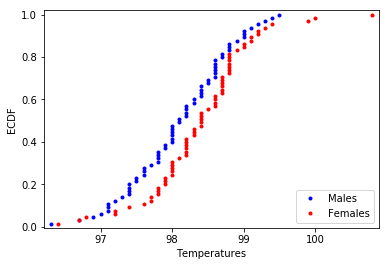

In [37]:
# Compute x,y values for ECDFs
x_M, y_M = ecdf(df_M.temperature)
x_F, y_F = ecdf(df_F.temperature)

# Plot the ECDFs
plt.plot(x_M, y_M, marker='.', linestyle='none', color='blue')
plt.plot(x_F, y_F, marker='.', linestyle='none',color='red')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('Males', 'Females'), loc='lower right')

# Label axes and show plot
plt.xlabel('Temperatures')
plt.ylabel('ECDF')
plt.show()


In [ ]:
#6 - Answer
"""
Is there a significant difference between males and females in normal temperature? Yes,
    There is a significant difference between males and females in normal temperature

What testing approach did you use and why?
    Two-Sample Z-scores
    null hypothesis for a 2-sample Z-scores is that the two groups are equal 
    